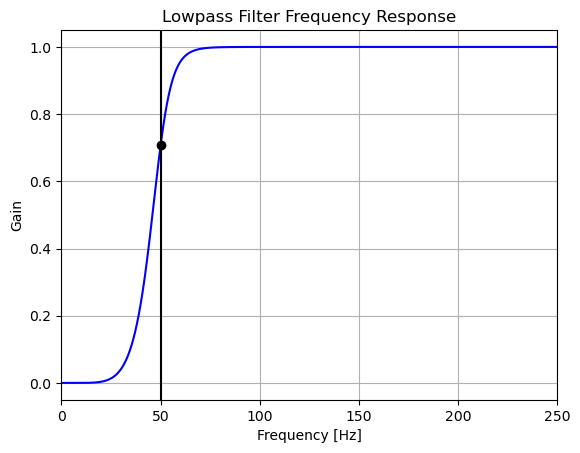

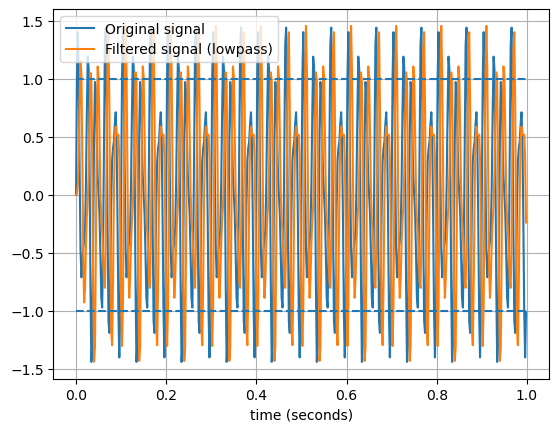

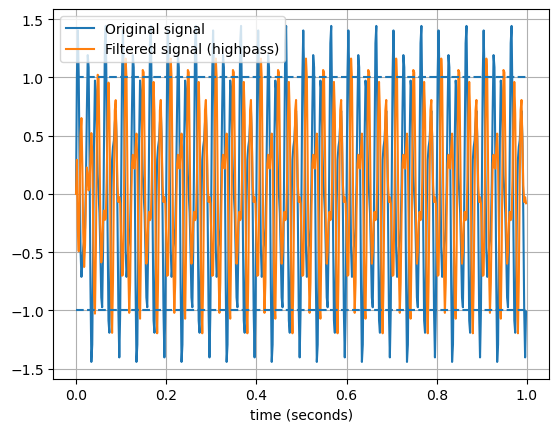

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

def run_filter(b, a, data):
    y = lfilter(b, a, data)
    return y

# Sample parameters
fs = 500.0
t = np.linspace(0, 1, int(fs), endpoint=False)  # Convert fs to integer
x = np.sin(50.0 * 2.0*np.pi*t) + 0.5*np.sin(80.0 * 2.0*np.pi*t)


# Filter parameters
order = 6
lowcut = 50.0
highcut = 100.0

# Apply filters
b, a = butter_lowpass(highcut, fs, order)
w, h = freqz(b, a, worN=8000)
x_low = run_filter(b, a, x)

b, a = butter_highpass(lowcut, fs, order)
w, h = freqz(b, a, worN=8000)
x_high = run_filter(b, a, x)

# Plot the frequency response
plt.figure(1)
plt.clf()
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.axvline(lowcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)

# Plot the original and filtered signals
plt.figure(2)
plt.clf()
plt.plot(t, x, label='Original signal')
plt.plot(t, x_low, label='Filtered signal (lowpass)')
plt.xlabel('time (seconds)')
plt.hlines([-1, 1], 0, 1, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.figure(3)
plt.clf()
plt.plot(t, x, label='Original signal')
plt.plot(t, x_high, label='Filtered signal (highpass)')
plt.xlabel('time (seconds)')
plt.hlines([-1, 1], 0, 1, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()


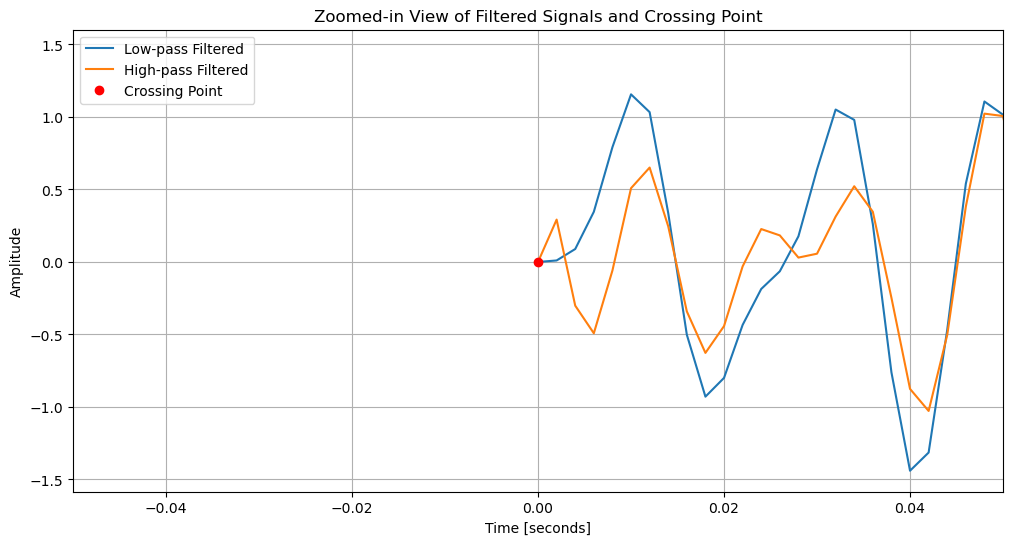

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# ... (previous code for filter design and signal generation) ...

# Find the crossing point
difference = x_low - x_high
crossing_index = np.argmin(np.abs(difference))
crossing_time = t[crossing_index]

# Define the time range for zooming in
zoom_start_time = crossing_time - 0.05  # 50 milliseconds before crossing
zoom_end_time = crossing_time + 0.05    # 50 milliseconds after crossing

# Plot the original and filtered signals with zooming
plt.figure(figsize=(12, 6))
plt.plot(t, x_low, label='Low-pass Filtered')
plt.plot(t, x_high, label='High-pass Filtered')
plt.plot(crossing_time, x_low[crossing_index], 'ro', label='Crossing Point')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Set x-axis limits for zooming
plt.xlim(zoom_start_time, zoom_end_time)

plt.title('Zoomed-in View of Filtered Signals and Crossing Point')
plt.show()